In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
df = pd.read_csv('https://ds-lecture-data.s3.ap-northeast-2.amazonaws.com/datasets/vgames2.csv')
df.sample(10)

,Unnamed: 0,Name,Platform,Year,Genre,Publisher,NA_Sales,EU_Sales,JP_Sales,Other_Sales
11793,11794,Rally Fusion: Race of Champions,XB,2002.0,Racing,Activision,0.04,0.01,0,0
8289,8290,Yu-Gi-Oh! 5D's Wheelie Breakers,Wii,2009.0,Racing,Konami Digital Entertainment,0.09,0.01,0,0.01
10468,10469,Imagine: Fashion Designer World Tour,DS,2009.0,Simulation,Ubisoft,0.27,0,0,0.02
6693,6694,Junior Classic Games,DS,2009.0,Misc,Avanquest,0.26,0.09,0,0.03
13740,13741,Starship Troopers,PC,2005.0,Shooter,Empire Interactive,0,0.02,0,0
3337,3338,NBA Ballers,PS2,2004.0,Sports,Midway Games,0.81,0.63,0,0.21
5046,5047,Miracle Girls Festival,PSV,2015.0,Misc,Sega,0,0,0.05,0
16288,16289,Germany's Next Topmodel 2011,DS,2011.0,Simulation,7G//AMES,0,0.01,0,0
14319,14320,Star Wars: Shadows of the Empire,N64,1996.0,Action,Nintendo,2,0.5,0.12,0.03
10288,10289,Ridge Racer,PS,1994.0,Racing,Sony Computer Entertainment,0,0,0.74,0.05


In [3]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 16598 entries, 0 to 16597
Data columns (total 10 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   Unnamed: 0   16598 non-null  int64  
 1   Name         16598 non-null  object 
 2   Platform     16598 non-null  object 
 3   Year         16327 non-null  float64
 4   Genre        16548 non-null  object 
 5   Publisher    16540 non-null  object 
 6   NA_Sales     16598 non-null  object 
 7   EU_Sales     16598 non-null  object 
 8   JP_Sales     16598 non-null  object 
 9   Other_Sales  16598 non-null  object 
dtypes: float64(1), int64(1), object(8)
memory usage: 1.3+ MB


In [4]:
df.describe()

,Unnamed: 0,Year
count,16598.000000,16327.000000
mean,8299.500000,1994.242543
std,4791.574219,155.077168
min,1.000000,0.000000
25%,4150.250000,2003.000000
50%,8299.500000,2007.000000
75%,12448.750000,2010.000000
max,16598.000000,2020.000000


In [5]:
df.drop('Unnamed: 0', axis = 1, inplace = True)

In [6]:
df[df['Name'] == 'Bejeweled 3']

,Name,Platform,Year,Genre,Publisher,NA_Sales,EU_Sales,JP_Sales,Other_Sales
2710,Bejeweled 3,PC,2010.0,Puzzle,PopCap Games,0.02,0.05,0,0.01
4608,Bejeweled 3,PS3,NaN,Puzzle,Unknown,0.13,0,0,0.01
10269,Bejeweled 3,DS,NaN,Puzzle,Unknown,0.32,0.02,0,0.03
16432,Bejeweled 3,X360,NaN,Puzzle,Unknown,0.13,0,0,0.01


In [7]:
dup_name_yn = df[df.duplicated(subset = ['Name'], keep = False) & df.Year.isnull()].Name.unique()
dup_name_gn = df[df.duplicated(subset = ['Name'], keep = False) & df.Genre.isnull()].Name.unique()

for i in dup_name_yn:
  df[df['Name'] == i] = df[df['Name'] == i].fillna(method = 'bfill')
  df[df['Name'] == i] = df[df['Name'] == i].fillna(method = 'ffill')

for i in dup_name_gn:
  df[df['Name'] == i] = df[df['Name'] == i].fillna(method = 'bfill')
  df[df['Name'] == i] = df[df['Name'] == i].fillna(method = 'ffill')

In [8]:
df.drop(df[df.duplicated(subset = ['Name'], keep = False) & df.Year.isnull()].index, inplace = True)
df.drop(df[df.duplicated(subset = ['Name'], keep = False) & df.Genre.isnull()].index, inplace = True)
df.drop(df[df['Year'].isnull()].index, inplace = True)
df.drop(df[df['Genre'].isnull()].index, inplace = True)
df['Publisher'].fillna('Unknown', inplace = True)
df.reset_index(drop = True, inplace = True)
df.Year = df.Year.astype(int)

In [9]:
temp = df.Year.copy()
temp[temp < 23] = temp[temp < 23] + 2000
temp[(temp > 23) & (temp < 100)] = temp[(temp > 23) & (temp < 100)] + 1900
df.Year = temp

In [10]:
Sales = df.columns[-4: ]

for i in Sales:
  df[i] = df[i].str.replace('M', '')
  df[i] = df[i].str.replace('m', '')
  temp = df[i].copy()
  temp[temp.str.contains('K')] = temp[temp.str.contains('K')].str.replace('K', '').astype(float) * 0.001
  df[i] = temp
  df[i] = df[i].astype(float)

In [11]:
df['Total_Sales'] = df['EU_Sales'] + df['JP_Sales'] + df['NA_Sales'] + df['Other_Sales']

In [12]:
df

,Name,Platform,Year,Genre,Publisher,NA_Sales,EU_Sales,JP_Sales,Other_Sales,Total_Sales
0,Candace Kane's Candy Factory,DS,2008,Action,Destineer,0.04,0.00,0.00,0.00,0.04
1,The Munchables,Wii,2009,Action,Namco Bandai Games,0.17,0.00,0.00,0.01,0.18
2,Otome wa Oanesama Boku ni Koi Shiteru Portable,PSP,2010,Adventure,Alchemist,0.00,0.00,0.02,0.00,0.02
3,Deal or No Deal: Special Edition,DS,2010,Misc,Zoo Games,0.04,0.00,0.00,0.00,0.04
4,Ben 10 Ultimate Alien: Cosmic Destruction,PS3,2010,Platform,D3Publisher,0.12,0.09,0.00,0.04,0.25
...,...,...,...,...,...,...,...,...,...,...
16416,Ice Age 2: The Meltdown,GC,2006,Platform,Vivendi Games,0.15,0.04,0.00,0.01,0.20
16417,Rainbow Islands: Revolution,PSP,2005,Action,Rising Star Games,0.01,0.00,0.00,0.00,0.01
16418,NBA 2K16,PS3,2015,Sports,Take-Two Interactive,0.44,0.19,0.03,0.13,0.79
16419,Toukiden: The Age of Demons,PSV,2013,Action,Tecmo Koei,0.05,0.05,0.25,0.03,0.38


In [13]:
df.groupby('Genre', as_index = False).mean()[['Genre', 'NA_Sales']].sort_values('NA_Sales', ascending = False).head(3)

,Genre,NA_Sales
4,Platform,0.508527
8,Shooter,0.447733
10,Sports,0.291978


In [14]:
df.groupby('Genre', as_index = False).mean()[['Genre', 'EU_Sales']].sort_values('EU_Sales', ascending = False).head(3)

,Genre,EU_Sales
8,Shooter,0.241241
4,Platform,0.229612
6,Racing,0.192076


In [15]:
df.groupby('Genre', as_index = False).mean()[['Genre', 'JP_Sales']].sort_values('JP_Sales', ascending = False).head(3)

,Genre,JP_Sales
7,Role-Playing,0.233778
4,Platform,0.149007
2,Fighting,0.103627


In [16]:
df.groupby('Genre', as_index = False).mean()[['Genre', 'Other_Sales']].sort_values('Other_Sales', ascending = False).head(3)

,Genre,Other_Sales
8,Shooter,0.079098
6,Racing,0.062393
4,Platform,0.058744


In [17]:
bins = list(range(1980, 2021, 5))
labels = [str(x) + ' - ' + str(x+5) for x in bins]
labels = labels[:-1]
labels[-1] = '2015 - 2017'
df['year_cat'] = pd.cut(df['Year'], bins = bins, labels = labels)

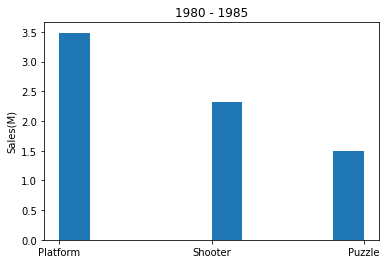

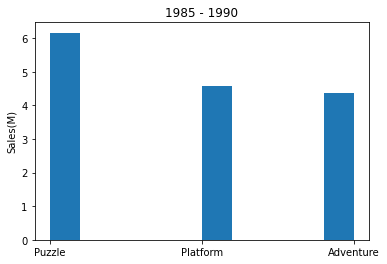

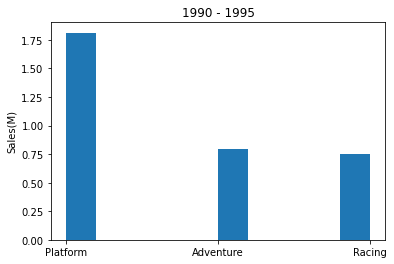

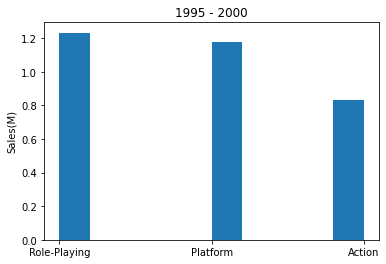

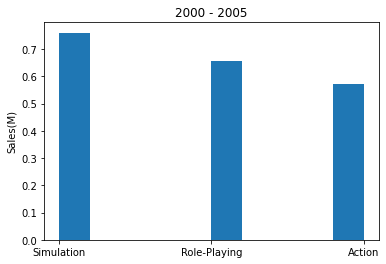

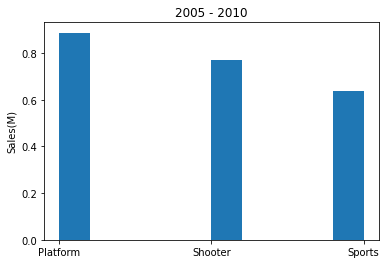

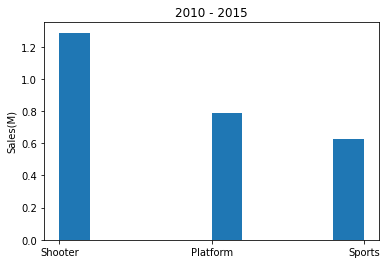

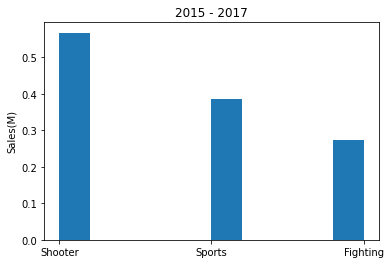

In [18]:
for x in labels:
  for_hist = df[df['year_cat'] == x].groupby(['Genre'], as_index = False).mean()[['Genre', 'Total_Sales']].sort_values('Total_Sales', ascending = False).head(3)
  plt.title(x)
  plt.ylabel('Sales(M)')
  plt.hist(x = for_hist['Genre'], weights = for_hist['Total_Sales'])
  plt.show()

In [36]:
pd.DataFrame(df[df['Year'] >= 2010].sort_values('Total_Sales', ascending = False)['Genre'].value_counts())

,Genre
Action,1457
Sports,574
Misc,569
Role-Playing,558
Adventure,541
Shooter,402
Racing,234
Simulation,211
Fighting,197
Strategy,171


In [28]:
df.query('(Genre == "Shooter" or Genre == "Action") and Year >= 2010').sort_values('Total_Sales', ascending = False).head(30)

,Name,Platform,Year,Genre,Publisher,NA_Sales,EU_Sales,JP_Sales,Other_Sales,Total_Sales,year_cat
3451,Grand Theft Auto V,PS3,2013,Action,Take-Two Interactive,7.01,9.27,0.97,4.14,21.39,2010 - 2015
10807,Grand Theft Auto V,X360,2013,Action,Take-Two Interactive,9.63,5.31,0.06,1.38,16.38,2010 - 2015
2786,Call of Duty: Modern Warfare 3,X360,2011,Shooter,Activision,9.03,4.28,0.13,1.32,14.76,2010 - 2015
6185,Call of Duty: Black Ops,X360,2010,Shooter,Activision,9.67,3.73,0.11,1.13,14.64,2005 - 2010
8981,Call of Duty: Black Ops 3,PS4,2015,Shooter,Activision,5.77,5.81,0.35,2.31,14.24,2010 - 2015
4198,Call of Duty: Black Ops II,PS3,2012,Shooter,Activision,4.99,5.88,0.65,2.52,14.04,2010 - 2015
6326,Call of Duty: Black Ops II,X360,2012,Shooter,Activision,8.25,4.30,0.07,1.12,13.74,2010 - 2015
13965,Call of Duty: Modern Warfare 3,PS3,2011,Shooter,Activision,5.54,5.82,0.49,1.62,13.47,2010 - 2015
9829,Call of Duty: Black Ops,PS3,2010,Shooter,Activision,5.98,4.44,0.48,1.83,12.73,2005 - 2010
1992,Grand Theft Auto V,PS4,2014,Action,Take-Two Interactive,3.80,5.81,0.36,2.02,11.99,2010 - 2015
